TASK_1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
print(X_train.columns)
X_test.shape

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


(102, 13)

In [5]:
tsne = TSNE(n_components = 2, learning_rate=250,random_state = 42)

X_train_tsne = tsne.fit_transform(X_train_scaled)



print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))


До:	(404, 13)
После:	(404, 2)


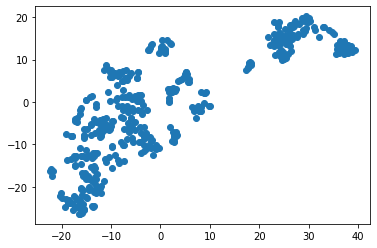

In [6]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

TASK_2.
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [10]:
train_labels = model.fit_predict(X_train_scaled)
train_labels.shape

(404,)

<function matplotlib.pyplot.show(*args, **kw)>

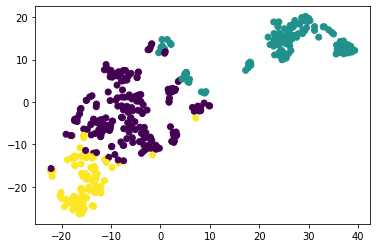

In [11]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=train_labels)

plt.show

среднее значение стоимости недвижимости в первом кластере

In [12]:
y_train[train_labels == 0].mean()

24.958115183246072

среднее значение стоимости недвижимости во втором кластере

In [13]:
y_train[train_labels == 1].mean()

16.165354330708663

среднее значение стоимости недвижимости в третьем кластере

In [14]:
y_train[train_labels == 2].mean()

27.78837209302326

среднее значение индекса преступности в первом кластере

In [15]:
print('Кластер 0: {}'.format(X_train.loc[train_labels == 0, 'CRIM'].mean()))

Кластер 0: 0.4216602094240837


среднее значение индекса преступности во втором кластере

In [16]:
print('Кластер 1: {}'.format(X_train.loc[train_labels == 1, 'CRIM'].mean()))

Кластер 1: 10.797028425196851


среднее значение индекса преступности в третьем кластере

In [17]:
print('Кластер 2: {}'.format(X_train.loc[train_labels == 2, 'CRIM'].mean()))

Кластер 2: 0.07356558139534884


TASK_3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [24]:
test_labels = model.predict(X_test_scaled)
test_labels.shape

(102,)

In [26]:
tsne_test = TSNE(n_components = 2, learning_rate=250,random_state = 42)

X_test_tsne = tsne_test.fit_transform(X_test_scaled)



print('До:\t{}'.format(X_test.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


<function matplotlib.pyplot.show(*args, **kw)>

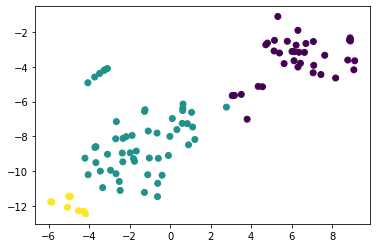

In [27]:
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c=test_labels)

plt.show

среднее значение стоимости недвижимости в первом кластере

In [28]:
y_test[test_labels == 0].mean()

16.710526315789473

среднее значение стоимости недвижимости во втором кластере

In [29]:
y_test[test_labels == 1].mean()

22.690909090909095

среднее значение стоимости недвижимости в третьем кластере

In [30]:
y_test[test_labels == 2].mean()

34.3111111111111

In [ ]:
среднее значение индекса преступности в первом кластере

In [31]:
print('Кластер 0: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean()))

Кластер 0: 9.419181842105264


In [ ]:
среднее значение индекса преступности во втором кластере

In [33]:
print('Кластер 0: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean()))

Кластер 0: 0.2192969090909091


In [ ]:
среднее значение индекса преступности в третьем кластере

In [32]:
print('Кластер 0: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean()))

Кластер 0: 0.04070333333333334
